<a href="https://colab.research.google.com/github/rohan-gt/machine-learning-from-scratch/blob/master/Prerequisite%20Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [45]:
import numpy as np
import pandas as pd
from scipy import stats

# Arithmetic

## Arithmetic Series
Series having start term $a$ and a common difference $d$:

$d = a_n - a_{n - 1}$

$n^{th}\space term\space a_n = a + (n - 1)d$

$Mean\space \mu = \dfrac{S_1 + S_n}{2} = \dfrac{2a + (n - 1)d}{2}$

$Sum\space S_n = n\mu = \dfrac{n}{2}[2a + (n - 1)d$]

## Geometric Series
Series having start term $a$ and a common ratio $d$:

$d = \dfrac{a_n}{a_{n - 1}}$

$n^{th}\space term\space a_n = ar^{n-1}$

$Sum\space S_n = \dfrac{a(1 - r^n)}{(1 - r)}$

# Statistical Measures

## Initialize variables

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Create random variables of size n
N = 1000
X = np.random.normal(size=N)
Y = np.random.normal(size=N)

# Sample random variables
n = 500
x = np.random.choice(X, n)
y = np.random.choice(Y, n)

## Mean (Arithmetic Mean)

In [ ]:
mean_population_x = np.sum(X) / N
print('Population Mean           =', np.round(mean_population_x, 2))

mean_sample_x = np.sum(x) / n
print('Estimated Population Mean =', np.round(mean_sample_x, 2))

Population Mean           = 0.02
Estimated Population Mean = 0.02


## Weighted Mean
Used when values are given along with a frequency

In [ ]:
f = np.random.randint(1, 10, size=n)
weighted_mean_sample_x = np.sum(x * f) / np.sum(f)
print('Weighted Mean =', np.round(weighted_mean_sample_x, 2))

Weighted Mean = 0.05


## Geometric Mean
Used to find side of square given dimensions of rectangle of same area, find average rate of increase of salary across years

In [ ]:
geometric_mean_sample_x = np.prod(x) ** (1/n)
print('Geometric Mean =', np.round(geometric_mean_sample_x, 2))

Geometric Mean = 0.51


## Harmonic Mean
Used to find the average of rates when the denominator is not fixed. eg. Find average speed of 2 swimmers for a single lap (instead of a fixed time which is denominator here)

In [ ]:
harmonic_mean_sample_x = n / np.sum(np.reciprocal(x))
print('Harmonic Mean =', np.round(harmonic_mean_sample_x, 2))

Harmonic Mean = 1.69


## Mean Absolute Deviation

## Median Absolute Deviation

## Variance
We divide by $n - 1$ for sample variance because we will always underestimate the population variance if we use $n$. This is because for any sample, the derivative of sample variance that minimizes it ie. 

$\dfrac{\mathrm{d}}{\mathrm{d}x}\dfrac{\Sigma(x - v)^2}{n} = 0$ (where $v$ is the sample variance for different samples)

gives us $v = \bar{x}$ which means sample variance is always lesser than population varaince using the same denominator $n$

In [ ]:
var_population_x = np.sum((X - mean_population_x) ** 2) / N
print('Population Variance           =', np.round(var_population_x, 2))

var_sample_x = np.sum((x - mean_sample_x) ** 2) / (n - 1)
print('Estimated Population Variance =', np.round(var_sample_x, 2))

Population Variance           = 0.96
Estimated Population Variance = 1.01


## Standard Deviation
We calclate the square root of the variance to bring the measure to its original units

In [ ]:
stddev_population_x = np.sqrt(var_population_x)
print('Population Standard Deviation           =', np.round(stddev_population_x, 2))

stddev_sample_x = np.sqrt(var_sample_x)
print('Estimated Population Standard Deviation =', np.round(stddev_sample_x, 2))

Population Standard Deviation           = 0.98
Estimated Population Standard Deviation = 1.01


## Coefficient of Variation
Used to compare stddev. of two random variables of different scales by scaling them by the mean

In [ ]:
CV_sample_x = stddev_sample_x / mean_sample_x
print('Coefficient of Variation (x) =', np.round(CV_sample_x, 2))

mean_sample_y = np.sum(y) / n
stddev_sample_y = np.sqrt(np.sum((x - mean_sample_y) ** 2) / (n - 1))
CV_sample_y = stddev_sample_y / mean_sample_y
print('Coefficient of Variation (y) =', np.round(CV_sample_y, 2))

Coefficient of Variation (x) = 54.7
Coefficient of Variation (y) = 17.21


## Skew

$Skew < 0.5 \Rightarrow Low~Skew$

$Skew < 1 \Rightarrow Moderate~Skew$

$Skew >=1 \Rightarrow High~Skew$

In [ ]:
skew_population_x = (1 / N) * np.sum((X - mean_population_x) ** 3) / (stddev_population_x ** 3)
if np.abs(skew_population_x) < 0.5:
    skew = '(Low Skew)'
elif np.abs(skew_population_x) < 1:
    skew = '(Moderate Skew)'
else:
    skew = '(High Skew)'
print('Population Skew           =', np.round(skew_population_x, 2), f'{skew}')

skew_sample_x = (n / ((n - 1) * (n - 2))) * np.sum((x - mean_sample_x) ** 3) / (stddev_sample_x ** 3)
if np.abs(skew_sample_x) < 0.5:
    skew = '(Low Skew)'
elif np.abs(skew_sample_x) < 1:
    skew = '(Moderate Skew)'
else:
    skew = '(High Skew)'
print('Estimated Population Skew =', np.round(skew_sample_x, 2), f'{skew}')

Population Skew           = 0.12 (Low Skew)
Estimated Population Skew = 0.19 (Low Skew)


## Kurtosis

Kurtosis for normal distributions is 3. A lot of times, Excess Kurtosis is used which is 0 for normal distributions:

$Excess\space Kurtosis = Kurtosis - 3$

$Excess~Kurtosis < 0 \Rightarrow Platykurtic~(Thinner~tails)$

$Excess~Kurtosis = 0 \Rightarrow Mesokurtic~(Normal~Distribution)$

$Excess~Kurtosis > 0 \Rightarrow Leptokurtic~(Fatter~tails)$

In [ ]:
kurtosis_population_x = (1 / N) * np.sum((X - mean_population_x) ** 4) / (stddev_population_x ** 4) - 3
if -2 <= np.abs(kurtosis_population_x) < 0:
    kurtosis = '(Platykurtic)'
elif np.abs(kurtosis_population_x) == 0:
    kurtosis = '(Mesokurtic)'
else:
    kurtosis = '(Leptokurtic)'
print('Population Kurtosis           =', np.round(kurtosis_population_x, 2), f'{kurtosis}')

kurtosis_sample_x = ((n * (n + 1))/ ((n - 1) * (n - 2) * (n - 3))) * np.sum((x - mean_sample_x) ** 4) / (stddev_sample_x ** 4) - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
if -2 <= np.abs(kurtosis_sample_x) < 0:
    kurtosis = '(Platykurtic)'
elif np.abs(kurtosis_sample_x) == 0:
    kurtosis = '(Mesokurtic)'
else:
    kurtosis = '(Leptokurtic)'
print('Estimated Population Kurtosis =', np.round(kurtosis_sample_x, 2), f'{kurtosis}')

Population Kurtosis           = 0.07 (Leptokurtic)
Estimated Population Kurtosis = 0.4 (Leptokurtic)


## Standard Error (of the Sample Mean)
It is the estimated error in the sample mean which is again an estimate of the population mean. As n increases the standard error decreases

$SE(\bar x) = \dfrac{s}{\sqrt n}$

In [ ]:
standard_error_x = mean_sample_x / np.sqrt(n)
print('Standard Error (x) =', np.round(standard_error_x, 2))

Standard Error (x) = 0.0


## Confidence Interval

$CI(\bar x)_{p,~n} = \bar x \pm SE(\bar x) \times t_{(p,~df=n-1)}$

## Covariance
Tells us if the relationship between 2 random variables are positive, negative or non-existant. It doesn't tell us the strength of the relationship

$COV(x, y) = \sigma_{xy} = \sum(x - \bar x)(y - \bar y)$

$V(x + y) = V(x) + V(y) + 2COV(x, y)$

In [ ]:
mean_sample_y = np.sum(y) / n
covariance = np.sum(x - mean_sample_x) * np.sum(y - mean_sample_y) / np.sum(x - mean_sample_x) ** 2
print('Covariance of random variables x, y =', covariance)
if covariance > 0:
    print('There is a positive covariance between x and y')

if covariance < 0:
    print('There is a negative covariance between x and y')

else:
    print('There is a no covariance between x and y')

Covariance of random variables x, y = -0.9
There is a negative covariance between x and y


## Pearson's (product moment) Correlation
The relationship has to be linear

$\rho_{xy} = \dfrac{\sigma_{xy}}{\sigma_x\sigma_y} = \dfrac{\sum(x - \bar x)(y - \bar y)}{\sqrt{\sum(x - \bar x)^2(y - \bar y)^2}}$

## Spearman's (rank-order) Correlation

Will be 1 for monotonically increasing and -1 for monotonically decreasing relationships. The relationship can be non-linear

# Permutations and Combinations

## Permutations
No. of ways in which you can arrange r things out of n

$^nP_r = \dfrac{n!}{(n-r)!}$

## Combinations
No. of ways in which you can select r things out of n

$^nC_r = \dfrac{n!}{r!(n-r)!}$

# Probability
If A and B are dependent:

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$

If A and B are independent:

$P(A \cup B) = P(A) + P(B)$

$P(A \cap B) = P(A) \times P(B)$

## Expected Value

Expected value of an event is the average outcome w.r.t. the different probabilities:

$E(X) = \Sigma XP(X = X)$

where $x$ represents an outcome of the event $X$ and $P(X = x)$ is the probability of the event with outcome $x$

In [ ]:
# Calculate the expected value of a die
x = np.array([1, 2, 3, 4, 5, 6])
P = np.array([1/6] * 6)
expected_value = np.sum(x * P)
print('Expected Value of a die =', expected_value)

Expected Value of a die = 3.5


## Variance
$V(X) = E(X^2) - E(X)^2$

## Markov's Inequality

If $X \ge 0$ and $a \ge 0$ then $P(X \ge a) \le \dfrac{E(X)}{a}$

## Chebyshev's Inequality

$P(|X - \mu| \ge c) \le 1 - \dfrac{\sigma^2}{c^2}$

Eg. $P(|X - \mu| \ge k\sigma) \le \dfrac{1}{k^2}$

## Conditional Probability
If A and B are dependent:

$P(A|B) = \dfrac{P(A \cap B)}{P(B)}$

If A and B are independent:

$P(A|B) = P(A)$


## Bayes' Theorem
$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$

# Probability Distributions

Probaility Mass Function (PMF) = $P(X = x)$ ; for discrete variables

Probaility Density Function (PDF) = $P(x_1 <= X <= x_2)$ ; for continuous variables

Cumulative Ditribution Function (CDF) = $P(X <= x)$ ; for both

Percent Point Function (PPF): The percent point function is the inverse of the cumulative distribution function. For this reason, the percent point function is also commonly referred to as the inverse distribution function

## Binomial Distribution [Discrete]
Use for modelling data having binary outcomes

$PMF~p(X = x) =\space ^nP_r\space p^x(1 - p)^{n - x}$

$Expected\space Value\space E(x) = np$

$Variance\space V(x) = np(1 - p)$

In [59]:
# Q1. Studies show color blindness affects 8% of men. What is the probability of
#     finding 2 color blind men from a sample of 10?
prob = stats.binom.pmf(2, 10, 0.08)
print('A1.', round(prob, 2))

# Q2. What is the probability of finding less than 2 color blind men from a
#     sample of 10?
prob = stats.binom.cdf(1, 10, 0.08)
print('A2.', round(prob, 2))

A1. 0.15
A2. 0.81


## Poisson Distribution [Discrete]
Use for modelling events occuring at a contant time interval and the probability of the event occuring is the same at every interval. Here $x\in[0, \infty)$ and $\lambda$ is the mean/expected value of events

$P(X = x) = \dfrac{e^{-\lambda}\lambda^x}{x!}$

$Expected\space Value\space E(x) = \lambda$

$Variance\space V(x) = \lambda$

In [64]:
# Q1. The no. of click-through sales from a Facebook ad is Poisson distributed 
#     with a mean of 12 click-through sales. What is the probability of getting
#     exactly 10 click-through sales in the first day?
prob = stats.poisson.pmf(10, 12)
print('A1.', round(prob, 2))

# Q2. What is the probability of getting at least 10 click-through sales in the
#     first day?
prob = 1 - stats.poisson.cdf(9, 12)
print('A2.', round(prob, 2))

# Q3. More than one sale in the first hour?
prob = 1 - stats.poisson.cdf(1, 12/24)
print('A3.', round(prob, 2))

A1. 0.1
A2. 0.76
A3. 0.09


## Hypergeometric Distribution [Discrete]
$PMF~p(k, M, n, N) = \frac{\binom{n}{k} \binom{M - n}{N - k}}
{\binom{M}{N}}$

In [77]:
# Q1. What is the probability of getting 2 spades in a 5 card poker hand?
prob = stats.hypergeom.pmf(2, 52, 5, 13)
print('A1.', round(prob * 100, 2), '%')

# Q2. What is the probability of getting 2 spades in a 5 card poker hand?
prob = stats.hypergeom.cdf(2, 52, 5, 13)
print('A2.', round(prob * 100, 2), '%')

# Q3. Poz has 2 spades (Texas Hold 'em Poker). What is the probability that Poz
#     scores a flush?
prob = 1 - stats.hypergeom.cdf(2, 50, 5, 11) + (3 * stats.hypergeom.pmf(5, 52, 5, 13))
print('A3.', round(prob * 100, 2), '%')

# Q4. What is the probability that Puck scores a flush if he has a club and a heart?
prob = (2 * (1 - stats.hypergeom.cdf(3, 51, 5, 12))) + (2 * stats.hypergeom.pmf(5, 52, 5, 13))
print('A4.', round(prob * 100, 2), '%')

A1. 27.43 %
A2. 90.72 %
A3. 6.55 %
A4. 1.81 %


## Exponential Distribution [Continuous]
Use for modelling time between events (inverse of Poisson)

$PMF~f(x) = \lambda e^{-\lambda x}$

$Expected\space Value\space E(x) = \lambda = \lambda_{poisson}^{-1}$


In [86]:
# Q1. Unique visitors arrive at a website by a Poisson process at an average
#     rate of 3 per hour. What is the probability that next visitor arrives 
#     within 10 minutes?
prob = stats.expon.cdf(10, scale=60/3)
print('A1.', round(prob * 100, 2), '%')

# Q2. What is the probability that next visitor comes after 30 minutes passes?
prob = 1 - stats.expon.cdf(30, scale=60/3)
print('A2.', round(prob * 100, 2), '%')

# Q2. What is the probability that next visitor comes in exactly 15 minutes?
print('A3. 0 %')

A1. 39.35 %
A2. 22.31 %
A3. 0 %


## Normal (z) Distribution [Continuous]

$PDF\space f(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}}e^{-\dfrac{(x - \mu)^2}{2\sigma^2}}$

Standard normal distribution is when $\mu = 0$ and $\sigma = 1$:

$z = \dfrac{X - \mu}{\sigma}$

## Law of Large Numbers
As the size of the sample increases, the mean value of the sample will better approximate the mean or expected value in the population. Therefore, as the sample size goes to infinity, the sample mean will converge to the population mean. It is important to be clear that the observations in the sample must be independent

Text(0, 0.5, 'Proability of Getting Heads')

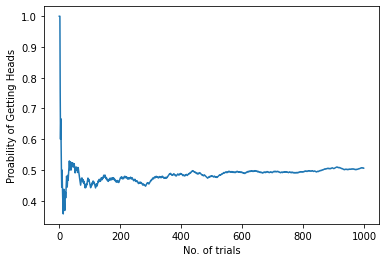

In [28]:
n = 1000
means = pd.Series(np.cumsum(np.random.choice([0, 1], n)) / range(1, n + 1))
ax = means.plot()
ax.set_xlabel('No. of trials')
ax.set_ylabel('Proability of Getting Heads')

## Central Limit Theorem
The central limit theorem states that if you have a population with mean $\mu$ and standard deviation $\sigma$ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means (or sum) will be approximately normally distributed (Even for coin tosses and dice rolls) with mean $\mu$ and standard deviation $\dfrac{\sigma}{\sqrt n}$.

## (Student's) t Distribution [Continuous]
Used for small samples from a normally distributed population. The t-statistic has $n-1$ degrees of freedom because it uses the population mean

$t_{n-1} = \dfrac{\bar x - \mu}{\dfrac{s}{\sqrt n}}$

In [46]:
# Q1. What proportion of a t-distribution (with df=4) exists above t=1.61?
perc = 1 - stats.t.cdf(1.61, 4)
print('A1.', round(perc, 2) * 100, '%')

# Q2. What t-statistic (with df=4) provides 2.5% in the upper tail?
t_stat = stats.t.ppf(1 - 0.025, 4)
print('A2.', round(t_stat, 2))

A1. 9.0 %
A2. 2.78


## Chi-Squared Distribution [Continuous]
Can be thought of as the square of a selection taken from a standard normal distribution. For $k$ (degrees of freedom) standard normal distributions:

$Q = \sum_{i=1}^{k}z_i^2 \sim \chi^2_k$

$Expected~Value~E(x) = k$

$Variance~V(x) = 2k$

In [120]:
# Import libraries
import ast

target_var_names = ['bin', 'dict', 'dir', 'iter', 'list', 'next', 'set', 'str']

source = """
class str: 
    def __init__(self, list): 
        def next(foo, iter=42, baz=1): bin = 2
"""

# Define function
def find_variable_assignments(source, target_var_names):
    """Function to find invalid variable assignments within Python code"""

    # Get nodes of Abstract Syntax Tree
    nodes = [node for node in ast.walk(ast.parse(source))]

    # Loop through nodes and identify invalid variables
    var_names = []
    for node in nodes:
        if isinstance(node, ast.ClassDef):
            var_names.append(node.name)
        
        elif isinstance(node, ast.FunctionDef):
            var_names.append(node.name)
            for arg in node.args.args:
                var_names.append(arg.arg)
        
        elif isinstance(node, ast.Assign):
            if isinstance(node.targets[0], ast.Name):
                var_names.append(node.targets[0].id)

            elif isinstance(node.targets[0], ast.Tuple):
                for elt in node.targets[0].elts:
                    var_names.append(elt.id)

    return list(set(target_var_names) & set(var_names))

find_variable_assignments(source, target_var_names)

['bin', 'iter', 'str', 'list', 'next']

In [236]:
args = [-5,-3,-2,-1,0,1,18,19,20,25,26,28,29,30,35,44,50]

ans = '-5,-3-1,18-20,25,26,28-30,35,44,50'

# Define function
def solution(args):
    """Function to group consecutive integers into ranges"""
  
    run = []
    result = []
    first, rest = args[0], args[1:]
    run.append(first)

    for n in rest + ['.']:
        if n != run[-1] + 1:
            if len(run) > 2:
                result.append(str(run[0]) + '-' + str(run[-1]))

            else:
                result += [str(r) for r in run] 

            run = [n]

        else:
            run.append(n)

    return ','.join(result)


solution(args) == ans

True